In [9]:
import pandas  as pd
import numpy   as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# load data 
df = pd.read_csv('filtered_energydata.csv')

In [11]:
X = df.drop('Appliances', axis=1)
y = df['Appliances']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# XGBoost
xg_reg = XGBRegressor(
    max_depth=10,
    n_estimators=700,)
xg_reg.fit(X_train, y_train)
prediction = xg_reg.predict(X_test)

In [14]:
# Evaluating the model
mae_value = mae(y_test, prediction)
mse_value = mse(y_test, prediction)
rmse_value = np.sqrt(mse_value)
r2_value = r2_score(y_test, prediction)

In [15]:
print(f"Mean Absolute Error (MAE): {mae_value:.2f} Wh")
print(f"Mean Squared Error (MSE): {mse_value:.2f} Wh²")
print(f"Root Mean Squared Error (RMSE): {rmse_value:.2f} Wh")
print(f"R² Score: {r2_value:.2f}")

Mean Absolute Error (MAE): 15.08 Wh
Mean Squared Error (MSE): 529.73 Wh²
Root Mean Squared Error (RMSE): 23.02 Wh
R² Score: 0.72


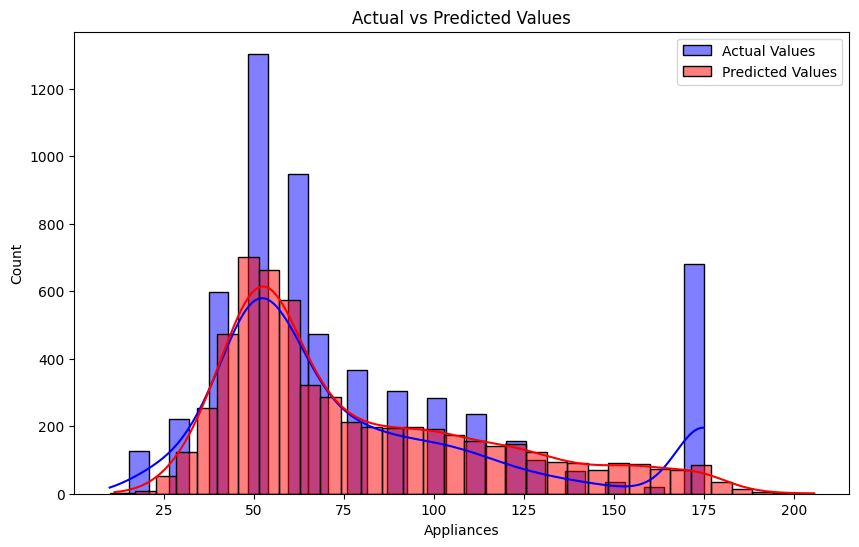

In [17]:
# Visualizing the predictions vs the actual values  
plt.figure(figsize=(10, 6))
sns.histplot(y_test, kde=True, color='blue', label='Actual Values')
sns.histplot(prediction, kde=True, color='red', label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()  

## <span style="color: #20C997;">Personal Analysis</span>
It seems that XGBoost has better performing than Linear Regression, it has lower MAE than Linear Regression, and it has much lower MSE than linear Regression.<br>
It explains 72% of the variation compared to 20% for Linear Regression.